### Trabajo con datos de fecha y hora

In [46]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dia = datetime( 2023, 7, 25) # (año,mes,día)
dia

datetime.datetime(2023, 7, 25, 0, 0)

In [3]:
print(dia)

2023-07-25 00:00:00


In [4]:
print(dia.date())

2023-07-25


In [5]:
print(dia.time())

00:00:00


In [6]:
type(dia)

datetime.datetime

In [7]:
dt = timedelta(100) # Por default viene en días

In [8]:
print(dt)

100 days, 0:00:00


In [9]:
print(dia+dt)

2023-11-02 00:00:00


In [10]:
print(dia - dt)

2023-04-16 00:00:00


In [11]:
delta = timedelta(days = 50, seconds= 17, hours = 8, minutes= 3)

In [12]:
print(dia + delta)

2023-09-13 08:03:17


In [13]:
datetime.now()

datetime.datetime(2023, 7, 26, 18, 16, 53, 820407)

In [14]:
print(datetime.now())

2023-07-26 18:16:53.829911


In [15]:
delta_col = timedelta(hours= 5)
print(delta_col)

5:00:00


Clase 26/07/2023

strftime = Transformación de formato de fecha y hora a cadena de caracteres

In [19]:
ya_col = datetime.now()

In [20]:
type(ya_col)

datetime.datetime

In [21]:
print(ya_col.microsecond)

582045


In [32]:
ya_str = datetime.strftime(ya_col, '%Y-%m-%d %H:%M:%S')
print(ya_str)
type(ya_str)

2023-07-26 18:22:30


str

strptime = Toma datos en formato de cadena de caracteres y la transforma en un objeto en formato de fecha y hora. El proceso inverso a *strftime*

In [34]:
now_str = '2023/07/26 18:37:10'
print(now_str)
type(now_str)

2023/07/26 18:37:10


str

In [37]:
now = datetime.strptime(now_str, '%Y/%m/%d %H:%M:%S') #Como leer la cadena de caracteres
print(now)
type(now)

2023-07-26 18:37:10


datetime.datetime

Ejemplo:

In [39]:
independencia = datetime(1810,7,20).date()
print(independencia)

1810-07-20


In [41]:
print(independencia.strftime('%A, %B %d, %Y'))

Friday, July 20, 1810


In [42]:
mensaje = 'Independence Day was on {:%A, %B %d, %Y}'
print(mensaje)

Independence Day was on {:%A, %B %d, %Y}


In [43]:
print(mensaje.format(independencia))

Independence Day was on Friday, July 20, 1810


In [49]:
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/era5_daily_series_anomaly_sst_neatlantic.csv'
df = pd.read_csv(url)
df

,date,sst,sst_clim,sst_ano
0,1979-01-01,19.610016,19.991547,-0.381531
1,1979-01-02,19.534363,19.963135,-0.428772
2,1979-01-03,19.489410,19.934845,-0.445435
3,1979-01-04,19.463806,19.906677,-0.442871
4,1979-01-05,19.458252,19.878754,-0.420502
...,...,...,...,...
16247,2023-06-26,22.926453,21.603210,1.323242
16248,2023-06-27,22.975647,21.637665,1.337982
16249,2023-06-28,22.974060,21.671630,1.302429
16250,2023-06-29,22.959534,21.705078,1.254456


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      16252 non-null  object 
 1   sst       16252 non-null  float64
 2   sst_clim  16252 non-null  float64
 3   sst_ano   16252 non-null  float64
dtypes: float64(3), object(1)
memory usage: 508.0+ KB


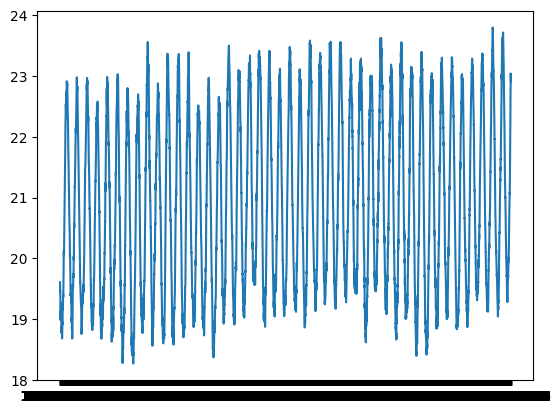

In [51]:
plt.plot(df.date, df.sst)
plt.show()

In [52]:
df.loc[0, 'sst']

19.610016

In [53]:
type(df.loc[0, 'sst'])

numpy.float64

In [54]:
df.loc[0, 'date']

'1979-01-01'

In [55]:
type(df.loc[0, 'date'])

str

In [56]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      16252 non-null  datetime64[ns]
 1   sst       16252 non-null  float64       
 2   sst_clim  16252 non-null  float64       
 3   sst_ano   16252 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 508.0 KB


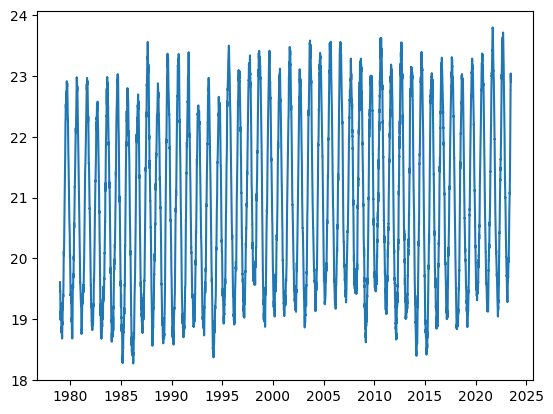

In [59]:
plt.plot(df.date, df.sst)
plt.show()

In [61]:
now.year

2023

In [63]:
df.date.dt.year # dt.year selecciona el año para la serie de tiempo

0        1979
1        1979
2        1979
3        1979
4        1979
         ... 
16247    2023
16248    2023
16249    2023
16250    2023
16251    2023
Name: date, Length: 16252, dtype: int32

In [66]:
df[ df.date.dt.year == 1979 ]

,date,sst,sst_clim,sst_ano
0,1979-01-01,19.610016,19.991547,-0.381531
1,1979-01-02,19.534363,19.963135,-0.428772
2,1979-01-03,19.489410,19.934845,-0.445435
3,1979-01-04,19.463806,19.906677,-0.442871
4,1979-01-05,19.458252,19.878754,-0.420502
...,...,...,...,...
360,1979-12-27,20.046356,20.134003,-0.087646
361,1979-12-28,20.064087,20.105500,-0.041412
362,1979-12-29,20.066376,20.076996,-0.010620
363,1979-12-30,20.041656,20.048492,-0.006836


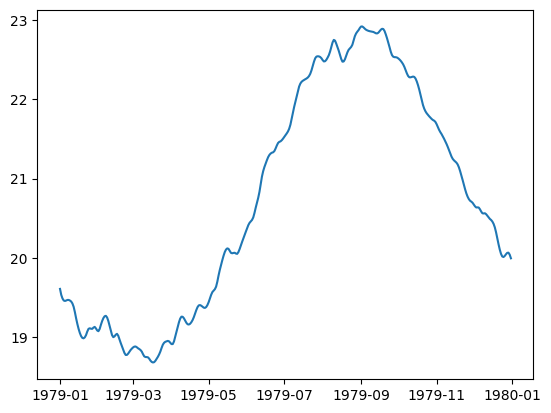

In [67]:
plt.plot(df.date[ df.date.dt.year == 1979 ], df.sst[ df.date.dt.year == 1979 ])
plt.show()

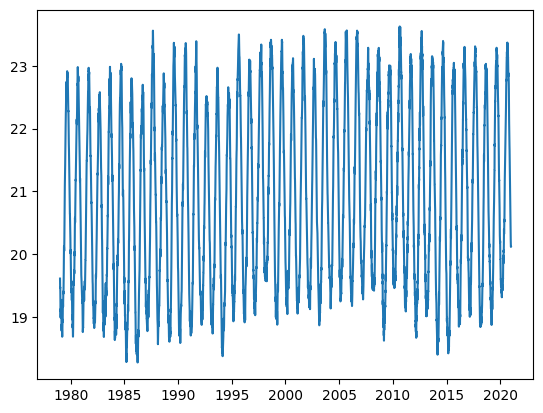

In [68]:
plt.plot(df.date[ df.date.dt.year <= 2020 ], df.sst[ df.date.dt.year <= 2020 ])
plt.show()

In [71]:
df.date[ df.date.dt.year == 1979 ][0].dayofyear

1

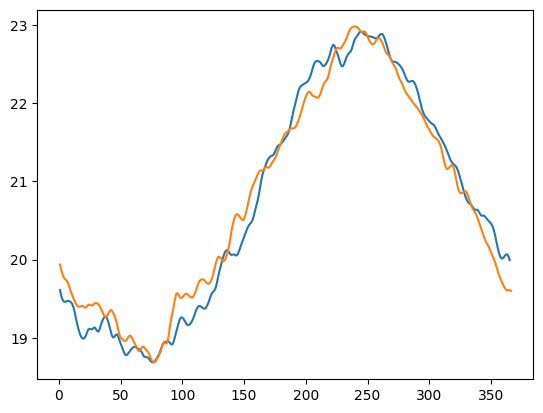

In [73]:
plt.plot(df.date[ df.date.dt.year == 1979 ].dt.dayofyear, df.sst[ df.date.dt.year == 1979 ])
plt.plot(df.date[ df.date.dt.year == 1980 ].dt.dayofyear, df.sst[ df.date.dt.year == 1980 ])
plt.show()

In [77]:
df.date.dt.year.unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

In [78]:
df.date.dt.year.nunique()

45

In [79]:
años = df.date.dt.year.unique()
años

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

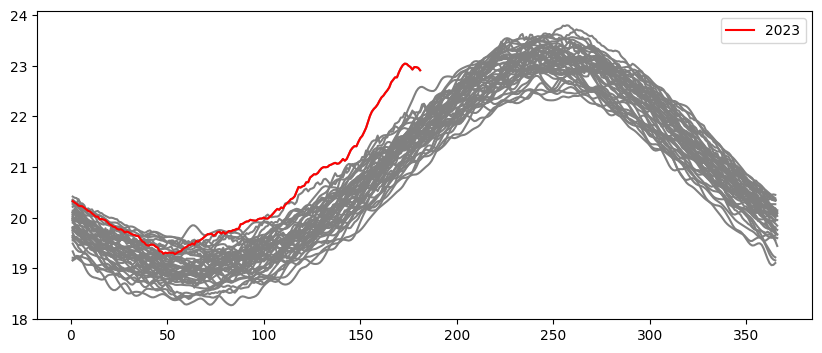

In [83]:
plt.figure(figsize= (10,4))
for n in años:
    plt.plot(df.date[ df.date.dt.year == n ].dt.dayofyear, df.sst[ df.date.dt.year == n ],
             color='gray')
plt.plot(df.date[ df.date.dt.year == 2023 ].dt.dayofyear, df.sst[ df.date.dt.year == 2023 ],
             color='red', label= '2023')
plt.legend()
plt.show()